# Sheet 1 - Practical Exercise
The datasets we will be using throughout the practical exercises of this course are subsets of the *FIFA 20 complete player dataset* from kaggle.com, which is extracted from the latest edition of FIFA, a football simulation game. In this dataset the player's attributes like personal data (e.g. Nationality, Club, Age, Value, …) and performances (e.g. Agression, Agility, Overall, Potential, …) are collected. (See [FIFA 20 complete player dataset](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv) for details.)

For the individual tasks we provide you with preprocessed data.

Before we start with the actual exercises make sure that you have imported all packages that you need, and loaded the dataset.

In [42]:
# Add your imports and load your data here
import pandas as pd
import numpy as np
import math

selected_df = pd.read_csv("fifa_20.csv")

## Exercise 1


First create a smaller Dataframe containing only the columns relevant for the coming exercises. These columns are:
- ``short_name``
- ``age``
- ``club``
- ``overall``
- ``potential``
- ``value_eur``
- ``wage_eur``
- ``team_position``

In [43]:
# add code creating a Dataframe with a subset of all available columns
df = selected_df[['short_name', 'age', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'team_position']].copy()

# Another method to create a smaller dataframe
# df = selected_df.loc[:,['short_name', 'age', 'overall', 'potential', 'value_eur', 'wage_eur', 'team_position']]

Next write a scaler to scale the values of a column to an interval between a new minimum and maximum value.  
It should use the following signature:

_Hint: Do **not** use a loop over all entries of the column! What other ways are there to manipulate columnar data?_

In [44]:
def my_scaler(column,min_val,max_val):
    # Add your code here
    scaled_column = ((max_val - min_val) / (column.max() - column.min())) *(column - column.min()) + min_val
    return scaled_column

To achieve this your scaler can implement the formula:  
$$\frac{max_{new}-min_{new}}{max_{old}-min_{old}}\cdot (v-min_{old})+min_{new}$$
where $max_{new}$ and $min_{new}$ are the new boundaries of the values, $max_{old}$ and $min_{old}$ are the old boundaries and $v$ is a value from the column that will be scaled.

* Now use your scaler on the column ``value_eur`` and scale it to an interval between $0$ and $100$.  
* Then take the new values for the ``value_eur`` und turn them into discrete values. If a player is below $25$ he should be categorized as ``low``, between $25$ and $50$ he should be categorized as ``low_average`` then between $50$ and $75$ as ``high_average`` and finally any that are above $75$ should be categorized as ``high``.  
* Finally create a histogram to show the distribution of the players' value.

In [45]:
# Add code to use your scaler on the value_eur-column
scaled_value = my_scaler(df.loc[:,'value_eur'], 0, 100)
df.loc[:,'value_eur'] = scaled_value
df.head()

,short_name,age,club,overall,potential,value_eur,wage_eur,team_position
0,L. Messi,32,FC Barcelona,94,94,90.521327,565000,RW
1,Cristiano Ronaldo,34,Juventus,93,93,55.450237,405000,LW
2,Neymar Jr,27,Paris Saint-Germain,92,92,100.000000,290000,CAM
3,J. Oblak,26,Atlético Madrid,91,93,73.459716,125000,GK
4,E. Hazard,28,Real Madrid,91,91,85.308057,470000,LW


In [46]:
# Add code to turn the new values of the value_eur column into the given discrete values
bins = [0, 25, 50, 75, 101]
df.loc[:,'value_eur'] = np.digitize(df.loc[:,'value_eur'], bins)
# mapping categorical value
df.loc[:,'value_eur'] = np.array(['low', 'low_average', 'high_average', 'high'])[df.loc[:,'value_eur']-1]

<AxesSubplot:>

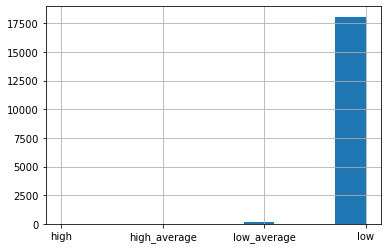

In [47]:
# Add code to create a histogram
df['value_eur'].hist()

## Exercise 2

Create a new column called ``leftover-potential`` which shows the difference between the value of ``overall`` and the value of ``potential``, to show how much more a given player can still grow.

In [48]:
# Add code to create the 'leftover-potential'-column
df.loc[:,'leftover_potential'] = df.loc[:,'potential'] - df.loc[:,'overall']
df.head()

,short_name,age,club,overall,potential,value_eur,wage_eur,team_position,leftover_potential
0,L. Messi,32,FC Barcelona,94,94,high,565000,RW,0
1,Cristiano Ronaldo,34,Juventus,93,93,high_average,405000,LW,0
2,Neymar Jr,27,Paris Saint-Germain,92,92,high,290000,CAM,0
3,J. Oblak,26,Atlético Madrid,91,93,high_average,125000,GK,2
4,E. Hazard,28,Real Madrid,91,91,high,470000,LW,0


Next create a histogram that shows how often how much potential is still left over.

In [57]:
# Add code to create the histogram
import plotly.express as px

fig = px.histogram(df, x='leftover_potential')
fig.show()

ModuleNotFoundError: No module named 'plotly'

## Exercise 3

Group the players by the club they are playing for. Then calculate the average of the ``overall`` column for each team.  

In [59]:
# Add code to group players and calculate the average 'overall' value of each club
club_overalls = df.loc[:,['club', 'overall']].groupby('club').mean()
club_overalls

,overall
club,
SSV Jahn Regensburg,64.680000
1. FC Heidenheim 1846,65.793103
1. FC Kaiserslautern,63.750000
1. FC Köln,71.612903
1. FC Magdeburg,64.333333
...,...
Zagłębie Lubin,61.600000
Çaykur Rizespor,67.608696
Örebro SK,60.814815


Then print the five Teams with the highest as well as the five teams with the lowest average ``overall`` value, so we can see which teams are the strongest and which teams are the weakest.

In [71]:
# Add code to select the strongest and weakest teams
club_overalls.sort_values(by='overall', ascending=False)[:5]

,overall
club,
FC Bayern München,81.304348
Real Madrid,80.121212
Juventus,80.060606
Uruguay,78.608696
FC Barcelona,78.363636


In [72]:
club_overalls.sort_values(by='overall', ascending=False)[-5:]

,overall
club,
Bolton Wanderers,56.086957
Waterford FC,55.850000
Crewe Alexandra,55.800000
Finn Harps,55.280000
UCD AFC,53.428571


Next determine the sum of the ``wages`` of each team. Print the five teams with the highest total ``wages`` and the five teams with the lowest total ``wages``, but only those that spend more than 0€ in total.

In [75]:
# Add code to calculate the total wages and print the highest and lowest spenders
club_wages = df.loc[:,['club', 'wage_eur']].groupby('club').sum()
club_wages.loc[(club_wages.loc[:,'wage_eur'] > 0), :].sort_values(by='wage_eur').iloc[:5,:]

,wage_eur
club,
Śląsk Wrocław,1000
Seongnam FC,1000
US Orléans Loiret Football,1000
GIF Sundsvall,1000
Wellington Phoenix,4000


In [76]:
club_wages.loc[(club_wages.loc[:,'wage_eur'] > 0), :].sort_values(by='wage_eur').iloc[-5:,:]

,wage_eur
club,
Manchester United,2874000
Juventus,3750000
Manchester City,3984000
FC Barcelona,4950000
Real Madrid,5354000


Do the greatest spenders and strongest teams match up? What about the lowest spenders and the weakest teams?